In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
housing_data = pd.read_csv('/content/data_assignment2.csv', delimiter=';')

In [ ]:
housing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313000,0","3,0","1,5",1340,7912,"1,5",0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2384000,0","5,0","2,5",3650,9050,"2,0",0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342000,0","3,0","2,0",1930,11947,"1,0",0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420000,0","3,0","2,25",2000,8030,"1,0",0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550000,0","4,0","2,5",1940,10500,"1,0",0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Convert 'price', 'bedrooms', and 'bathrooms' columns to numeric, handling commas
for col in ['price', 'bedrooms', 'bathrooms', 'floors']:
    # Replace commas with periods for decimal points and convert to numeric
    housing_data[col] = pd.to_numeric(housing_data[col].str.replace(',', '.'), errors='coerce')
    # Fill NaN values with 0 (or another appropriate strategy)
    housing_data[col] = housing_data[col].fillna(0)
    # Convert to int64 if all values are integers after filling NaN
    housing_data[col] = housing_data[col].astype('int64')

In [ ]:
# drop the date column
housing_data = housing_data.drop('date', axis=1)

In [ ]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          4600 non-null   int64 
 1   bedrooms       4600 non-null   int64 
 2   bathrooms      4600 non-null   int64 
 3   sqft_living    4600 non-null   int64 
 4   sqft_lot       4600 non-null   int64 
 5   floors         4600 non-null   int64 
 6   waterfront     4600 non-null   int64 
 7   view           4600 non-null   int64 
 8   condition      4600 non-null   int64 
 9   sqft_above     4600 non-null   int64 
 10  sqft_basement  4600 non-null   int64 
 11  yr_built       4600 non-null   int64 
 12  yr_renovated   4600 non-null   int64 
 13  street         4600 non-null   object
 14  city           4600 non-null   object
 15  statezip       4600 non-null   object
 16  country        4600 non-null   object
dtypes: int64(13), object(4)
memory usage: 611.1+ KB


In [ ]:
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.517858e+05,3.399348,1.788913,2139.346957,1.477564e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639434e+05,0.911548,0.752185,963.206916,3.562714e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.224250e+05,3.000000,1.000000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.680000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Check for missing values
print(housing_data.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
# prompt: drop all rows with seattle

housing_data = housing_data[housing_data['city'] != 'Seattle']

In [ ]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
6,335000,2,2,1350,2560,1,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA


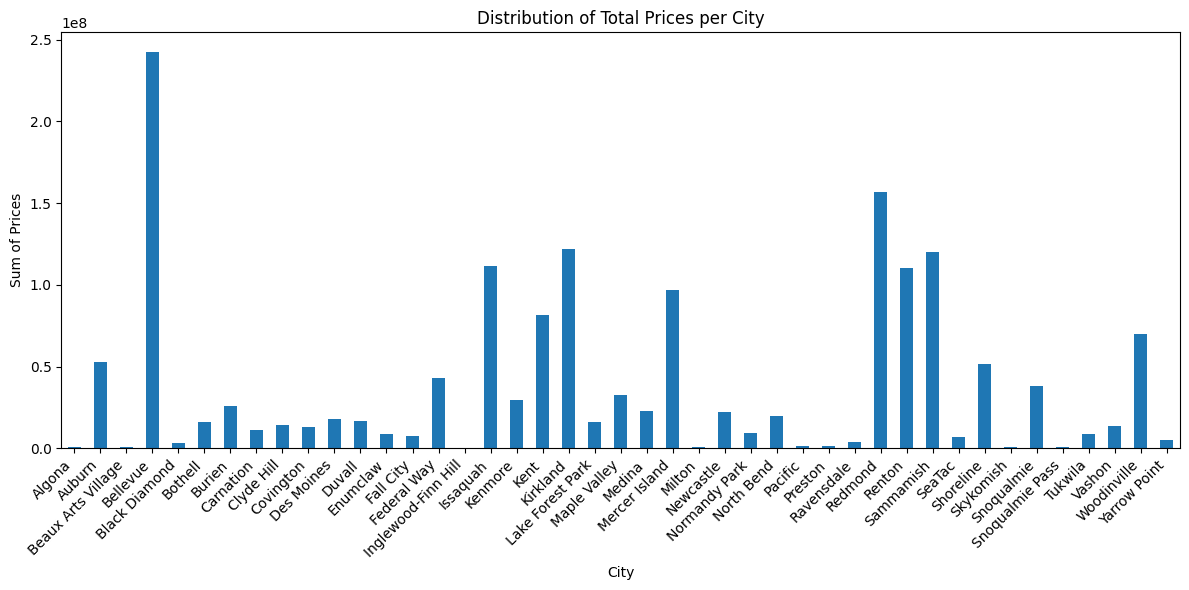

In [ ]:
# prompt: data visualization bar chart to show the distribution between sum of prices per city

# Group data by city and calculate the sum of prices
city_prices = housing_data.groupby('city')['price'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
city_prices.plot(kind='bar')
plt.title('Distribution of Total Prices per City')
plt.xlabel('City')
plt.ylabel('Sum of Prices')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: create a function to show each city and their total house prices and arrange from ascending to descending

def city_prices(housing_data):
  """
  Calculates total house prices for each city and sorts them in descending order.

  Args:
    housing_data: A pandas DataFrame containing housing data with 'city' and 'price' columns.

  Returns:
    A pandas Series with city names as index and total prices as values, sorted in descending order.
  """
  city_total_prices = housing_data.groupby('city')['price'].sum().sort_values(ascending=False)
  return city_total_prices


In [ ]:
city_total_prices = housing_data.groupby('city')['price'].sum().sort_values(ascending=False)


In [ ]:
print(city_total_prices)

city
Bellevue               242293667
Redmond                156897637
Kirkland               121846128
Sammamish              120210573
Issaquah               111482620
Renton                 110472996
Mercer Island           96648315
Kent                    81306097
Woodinville             69649977
Auburn                  52683915
Shoreline               51708258
Federal Way             42903379
Snoqualmie              38077676
Maple Valley            32301590
Kenmore                 29534606
Burien                  25822095
Medina                  22512150
Newcastle               21979541
North Bend              19978285
Des Moines              17689567
Duvall                  16967753
Lake Forest Park        16145100
Bothell                 15887582
Clyde Hill              14541400
Vashon                  13704150
Covington               12737907
Carnation               11192543
Normandy Park            9122275
Tukwila                  8940412
Enumclaw                 8613208
Fall 

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          3027 non-null   int64 
 1   bedrooms       3027 non-null   int64 
 2   bathrooms      3027 non-null   int64 
 3   sqft_living    3027 non-null   int64 
 4   sqft_lot       3027 non-null   int64 
 5   floors         3027 non-null   int64 
 6   waterfront     3027 non-null   int64 
 7   view           3027 non-null   int64 
 8   condition      3027 non-null   int64 
 9   sqft_above     3027 non-null   int64 
 10  sqft_basement  3027 non-null   int64 
 11  yr_built       3027 non-null   int64 
 12  yr_renovated   3027 non-null   int64 
 13  street         3027 non-null   object
 14  city           3027 non-null   object
 15  statezip       3027 non-null   object
 16  country        3027 non-null   object
dtypes: int64(13), object(4)
memory usage: 425.7+ KB


In [ ]:
# prompt: what is the sample size of the data

print(len(housing_data))

3027


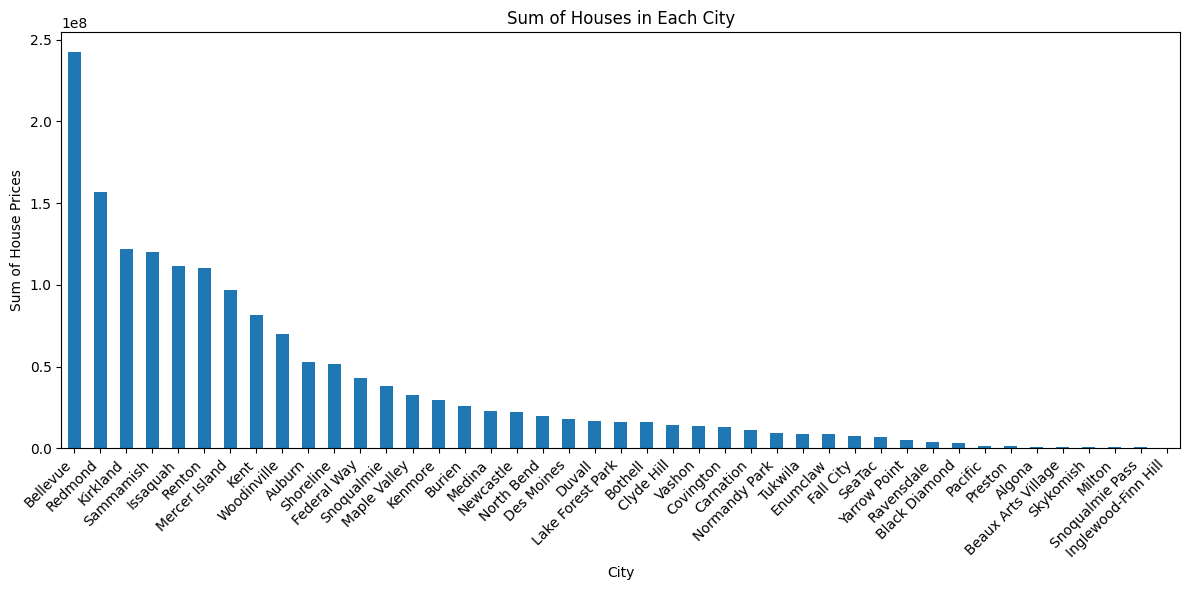

In [ ]:
# prompt: show the sum of houses in each city in a bar chart visualization

import matplotlib.pyplot as plt

# Assuming 'city_total_prices' is already calculated as in the previous code

plt.figure(figsize=(12, 6))
city_total_prices.plot(kind='bar')
plt.title('Sum of Houses in Each City')
plt.xlabel('City')
plt.ylabel('Sum of House Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                   City  Total_Price  Rank
0              Bellevue    242293667     1
1               Redmond    156897637     2
2              Kirkland    121846128     3
3             Sammamish    120210573     4
4              Issaquah    111482620     5
5                Renton    110472996     6
6         Mercer Island     96648315     7
7                  Kent     81306097     8
8           Woodinville     69649977     9
9                Auburn     52683915    10
10            Shoreline     51708258    11
11          Federal Way     42903379    12
12           Snoqualmie     38077676    13
13         Maple Valley     32301590    14
14              Kenmore     29534606    15
15               Burien     25822095    16
16               Medina     22512150    17
17            Newcastle     21979541    18
18           North Bend     19978285    19
19           Des Moines     17689567    20
20               Duvall     16967753    21
21     Lake Forest Park     16145100    22
22         

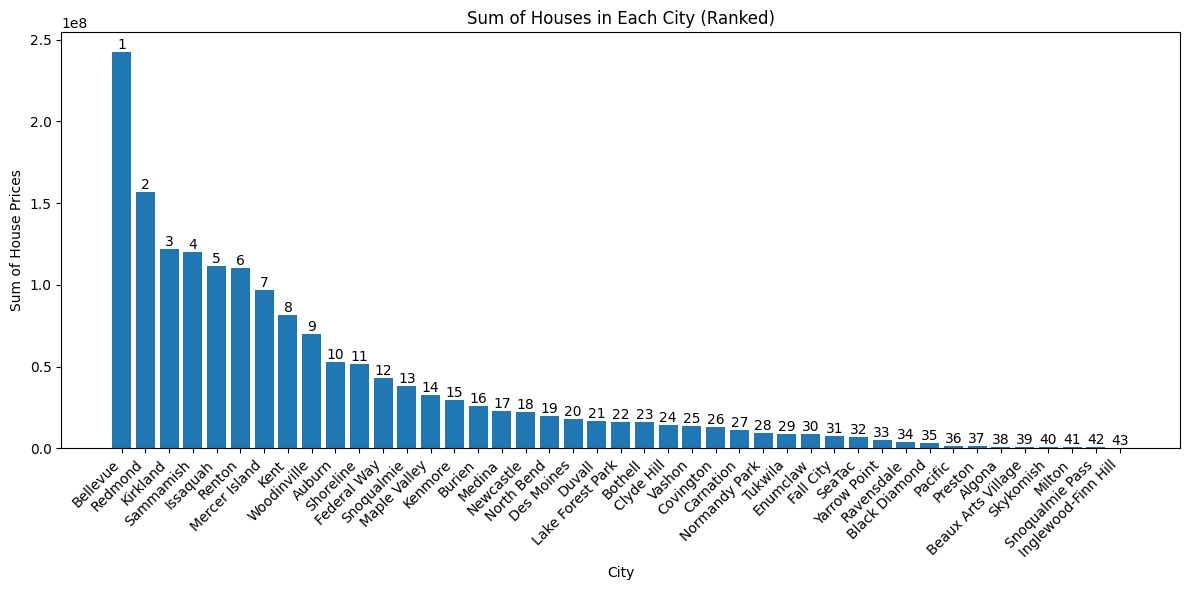

In [ ]:
# prompt: sum of houses in each city in descending order with a rank column

# Assuming 'city_total_prices' is already calculated as in the previous code

# Create a DataFrame from the Series
city_prices_df = city_total_prices.reset_index()
city_prices_df.columns = ['City', 'Total_Price']

# Add a rank column based on total price
city_prices_df['Rank'] = city_prices_df['Total_Price'].rank(ascending=False, method='min').astype(int)

# Display the DataFrame
print(city_prices_df)


# Create a bar chart with rank information
plt.figure(figsize=(12, 6))
bars = plt.bar(city_prices_df['City'], city_prices_df['Total_Price'])
plt.title('Sum of Houses in Each City (Ranked)')
plt.xlabel('City')
plt.ylabel('Sum of House Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add rank labels above each bar
for bar, rank in zip(bars, city_prices_df['Rank']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, rank, ha='center', va='bottom')

plt.show()

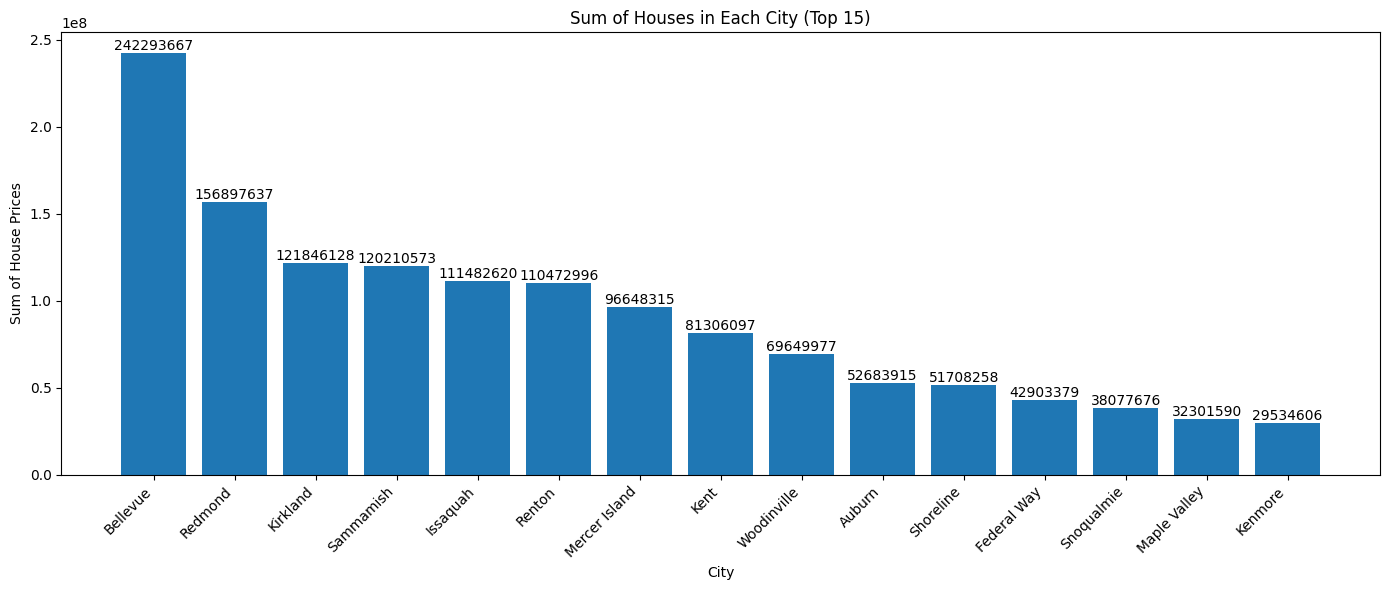

In [ ]:
# prompt: show the sum of houses in each city add sum of house price label for each bar but only for the highest 15 cities

import matplotlib.pyplot as plt

# Assuming 'city_total_prices' is already calculated as in the previous code

# Create a DataFrame from the Series
city_prices_df = city_total_prices.reset_index()
city_prices_df.columns = ['City', 'Total_Price']

# Sort the DataFrame by Total_Price in descending order
city_prices_df = city_prices_df.sort_values('Total_Price', ascending=False)

# Get the top 15 cities
top_15_cities = city_prices_df.head(15)

# Create a bar chart with rank information
plt.figure(figsize=(14, 6))
bars = plt.bar(top_15_cities['City'], top_15_cities['Total_Price'])
plt.title('Sum of Houses in Each City (Top 15)')
plt.xlabel('City')
plt.ylabel('Sum of House Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total price labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

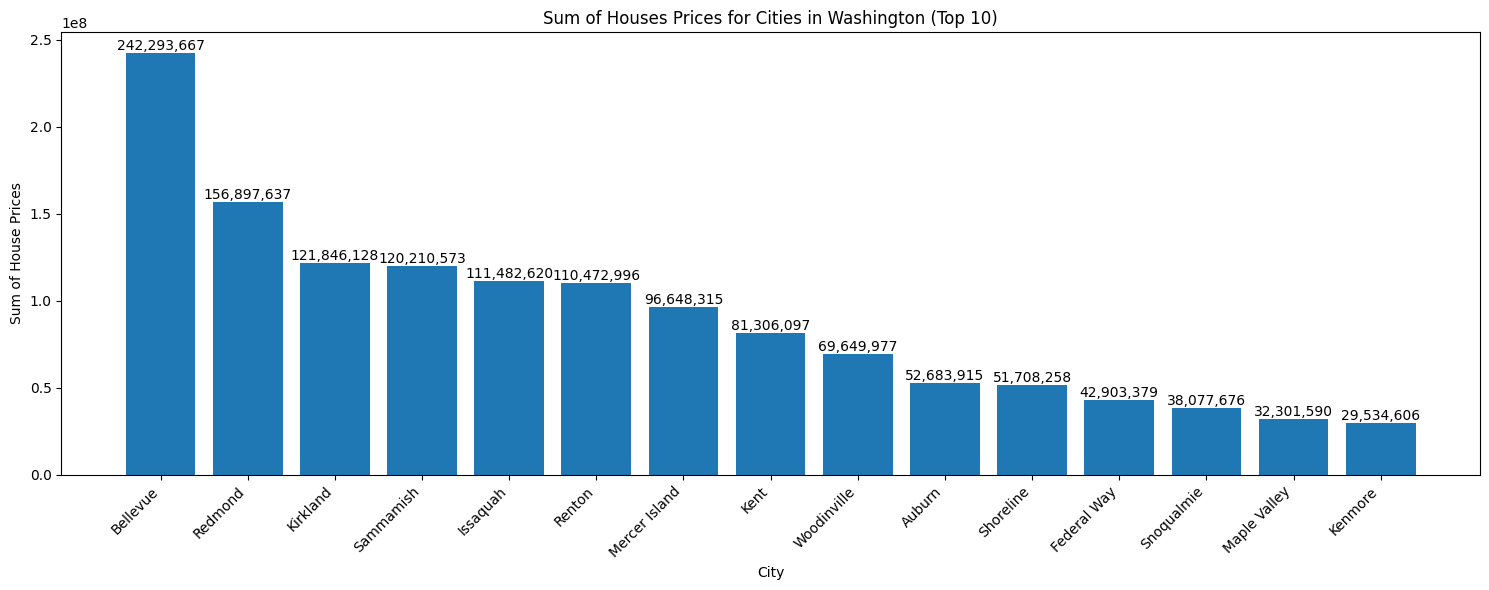

In [ ]:
# prompt: show the sum of houses in each city add sum of house price label for each bar but only for the highest 10 cities let the numbers be in an accounting format separated by commas

# Assuming 'city_total_prices' is already calculated as in the previous code

# Create a DataFrame from the Series
city_prices_df = city_total_prices.reset_index()
city_prices_df.columns = ['City', 'Total_Price']

# Sort the DataFrame by Total_Price in descending order
city_prices_df = city_prices_df.sort_values('Total_Price', ascending=False)

# Get the top 10 cities
top_10_cities = city_prices_df.head(15)

# Create a bar chart with rank information
plt.figure(figsize=(15, 6))
bars = plt.bar(top_10_cities['City'], top_10_cities['Total_Price'])
plt.title('Sum of Houses Prices for Cities in Washington (Top 10)')
plt.xlabel('City')
plt.ylabel('Sum of House Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total price labels above each bar with accounting format
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", ha='center', va='bottom') # Use f-string for formatting

plt.show()

In [ ]:
# prompt: mean house price of each city

# Calculate the mean house price for each city
mean_house_price_by_city = housing_data.groupby('city')['price'].mean()

# Print the result
mean_house_price_by_city

,price
city,
Algona,2.072880e+05
Auburn,2.993404e+05
Beaux Arts Village,7.450000e+05
Bellevue,8.471807e+05
Black Diamond,3.396056e+05
Bothell,4.814419e+05
Burien,3.489472e+05
Carnation,5.087520e+05
Clyde Hill,1.321945e+06


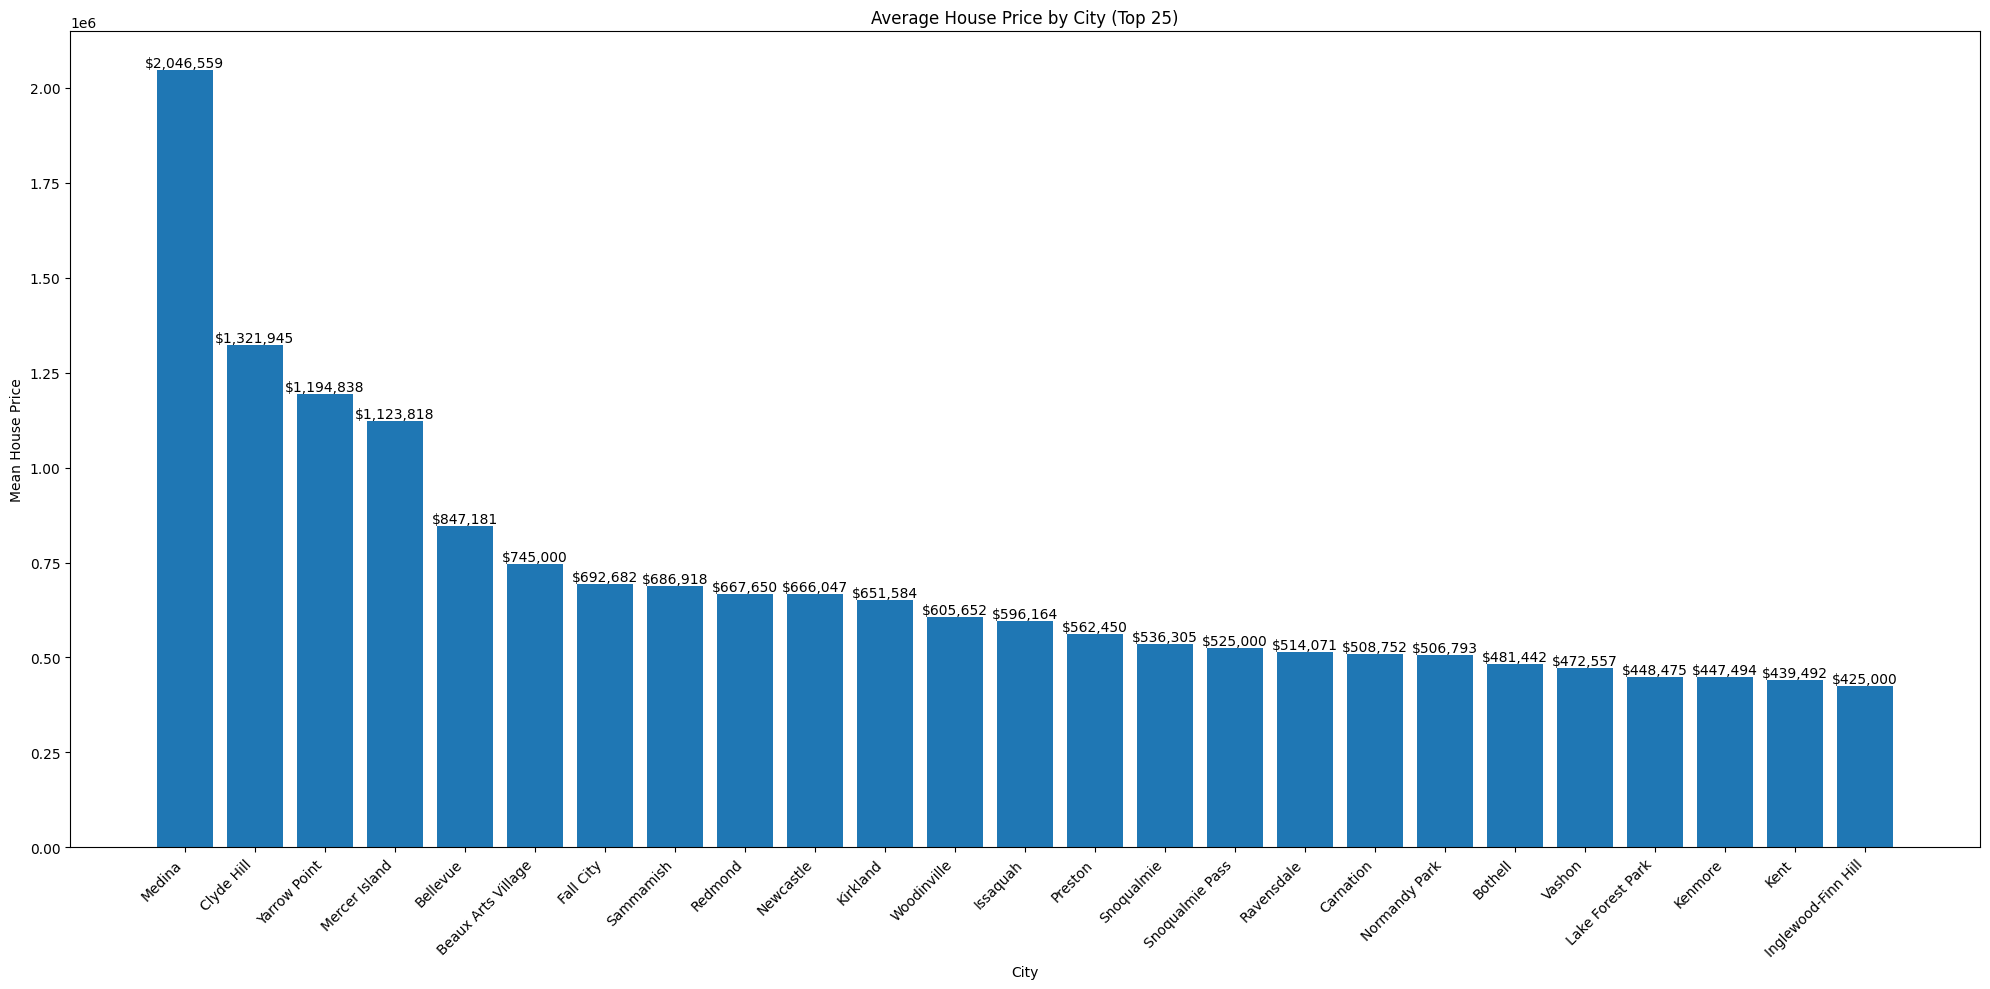

In [ ]:
# prompt: mean house price of each city add mean house price label for each bar but only for the highest 10 cities let the numbers be in an accounting format separated by commas

import matplotlib.pyplot as plt

# Assuming 'mean_house_price_by_city' is already calculated as in the previous code

# Sort cities by mean house price in descending order and get the top 10
top_10_cities = mean_house_price_by_city.sort_values(ascending=False).head(25)

# Create the bar chart
plt.figure(figsize=(20, 10))
bars = plt.bar(top_10_cities.index, top_10_cities.values)
plt.title('Average House Price by City (Top 25)')
plt.xlabel('City')
plt.ylabel('Mean House Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add mean house price labels above each bar with accounting format
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", ha='center', va='bottom')

plt.show()

city
Renton                 293
Bellevue               286
Redmond                235
Issaquah               187
Kirkland               187
Kent                   185
Auburn                 176
Sammamish              175
Federal Way            148
Shoreline              123
Woodinville            115
Maple Valley            96
Mercer Island           86
Burien                  74
Snoqualmie              71
Kenmore                 66
Des Moines              58
North Bend              50
Covington               43
Duvall                  42
Lake Forest Park        36
Newcastle               33
Bothell                 33
Tukwila                 29
Vashon                  29
SeaTac                  29
Enumclaw                28
Carnation               22
Normandy Park           18
Fall City               11
Medina                  11
Clyde Hill              11
Black Diamond            9
Ravensdale               7
Pacific                  6
Algona                   5
Yarrow Point           

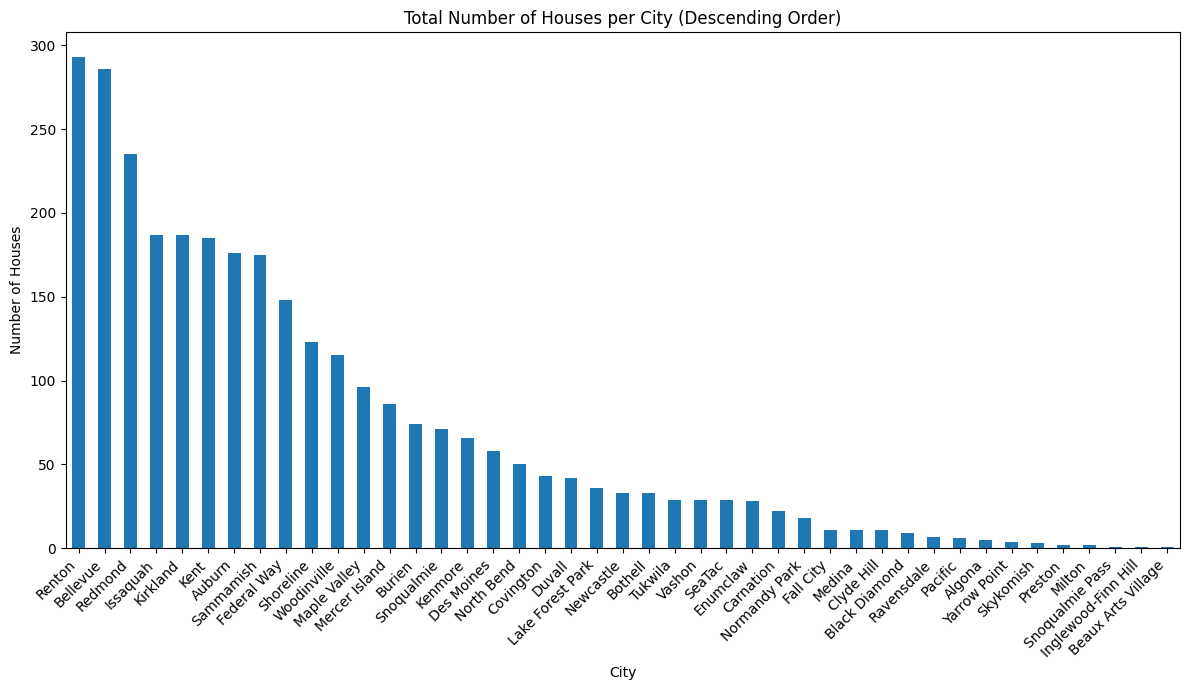

In [ ]:
# prompt: create total count of houses in each city arrange in descending order there is not id column

# Assuming 'housing_data' DataFrame is already loaded and processed as in the previous code

# Calculate the total count of houses in each city
city_house_counts = housing_data.groupby('city')['price'].count().sort_values(ascending=False)

# Print the result
print(city_house_counts)

# Create a bar chart for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
city_house_counts.plot(kind='bar')
plt.title('Total Number of Houses per City (Descending Order)')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

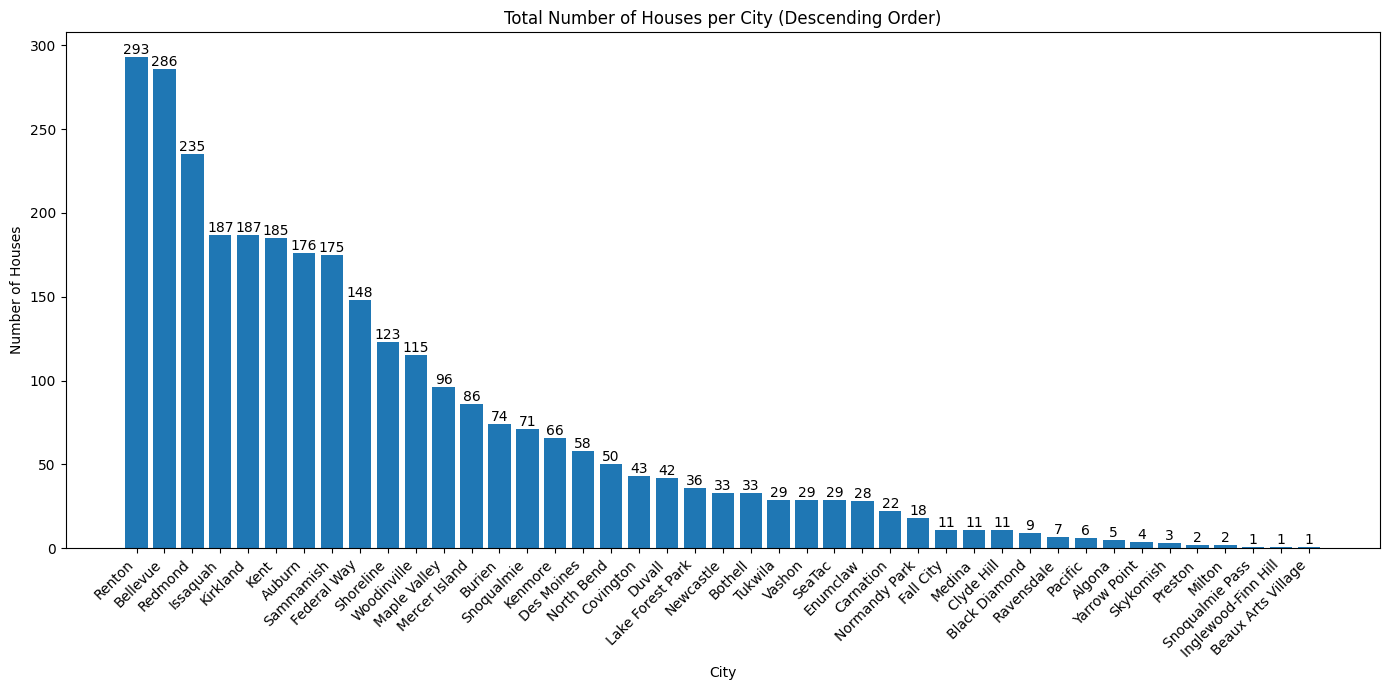

In [ ]:
# prompt: total number of houses per city add number of houses label for each bar

import matplotlib.pyplot as plt

# Assuming 'city_house_counts' is already calculated as in the previous code

# Create a bar chart for visualization
plt.figure(figsize=(14, 7))
bars = plt.bar(city_house_counts.index, city_house_counts.values)
plt.title('Total Number of Houses per City (Descending Order)')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of houses as labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [ ]:
# prompt: count of cities in the dataset

# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the number of unique cities
num_cities = housing_data['city'].nunique()

print(f"Number of unique cities in the dataset: {num_cities}")

Number of unique cities in the dataset: 43


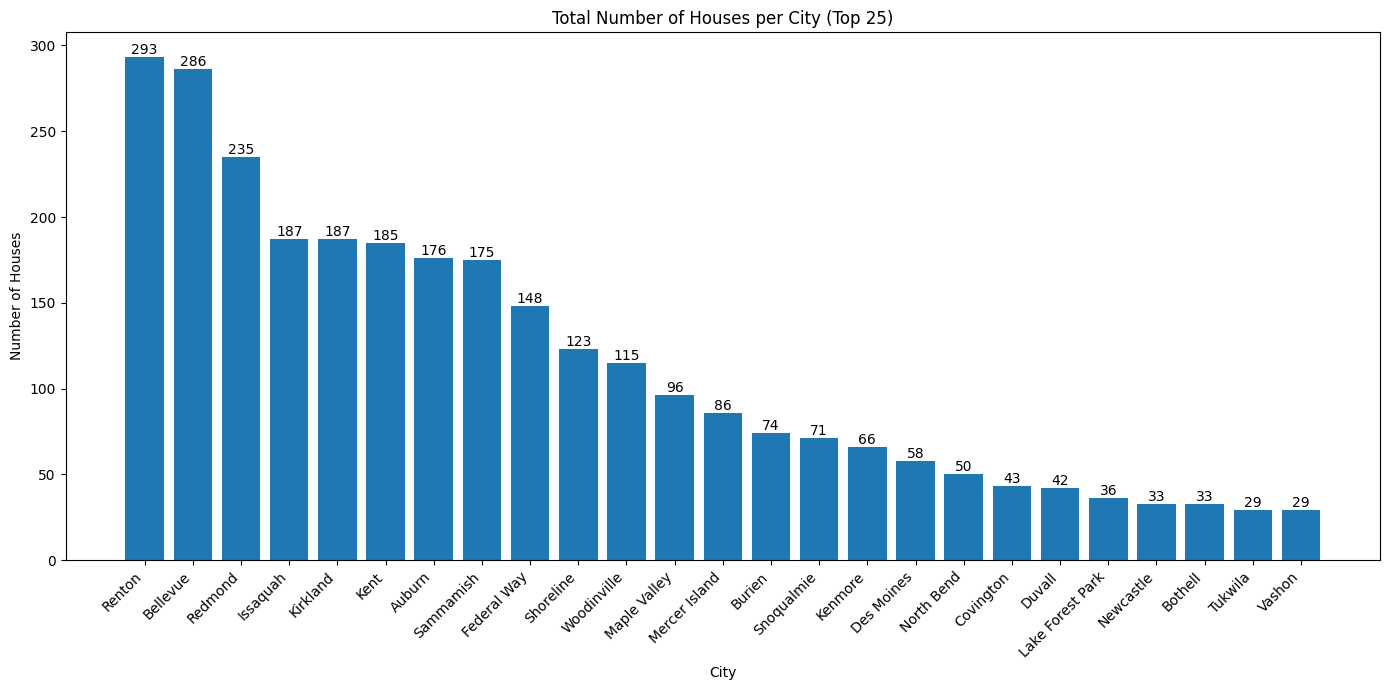

In [ ]:
# prompt: total number of houses per city add number of houses label for each bar top 25

# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the total count of houses in each city
city_house_counts = housing_data.groupby('city')['price'].count().sort_values(ascending=False).head(25)

# Create a bar chart for visualization
plt.figure(figsize=(14, 7))
bars = plt.bar(city_house_counts.index, city_house_counts.values)
plt.title('Total Number of Houses per City (Top 25)')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of houses as labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

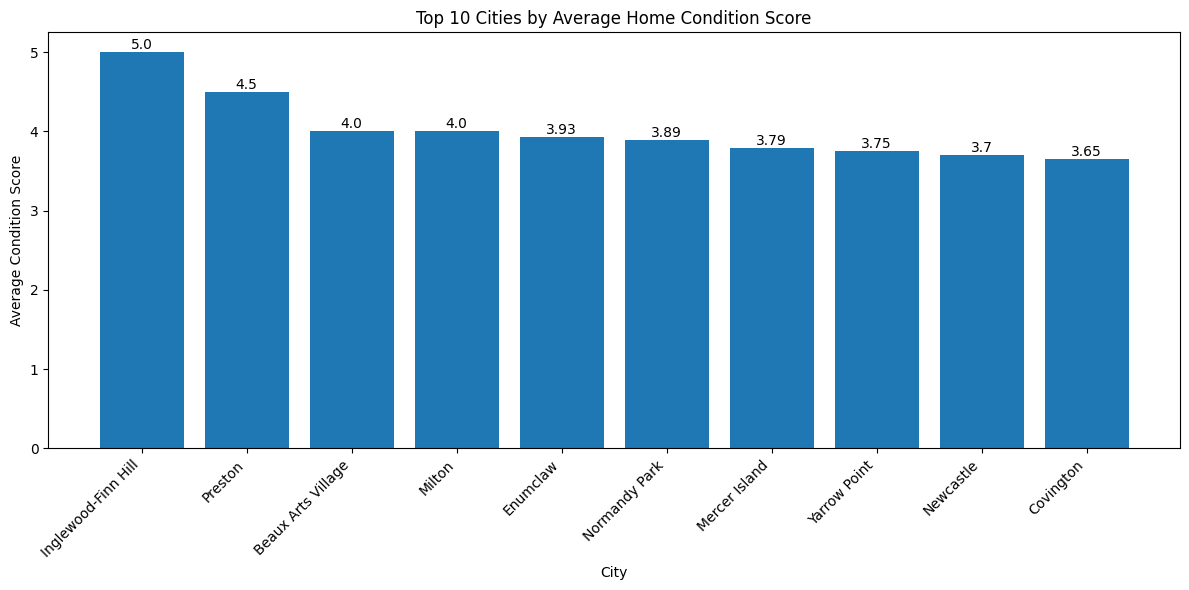

In [ ]:
# prompt: Bar Chart of Top 10 cities by Average Home Condition Score

# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the average home condition score for each city
city_avg_condition = housing_data.groupby('city')['condition'].mean().sort_values(ascending=False)

# Get the top 10 cities
top_10_cities_condition = city_avg_condition.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities_condition.index, top_10_cities_condition.values)
plt.title('Top 10 Cities by Average Home Condition Score')
plt.xlabel('City')
plt.ylabel('Average Condition Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the average condition score as labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

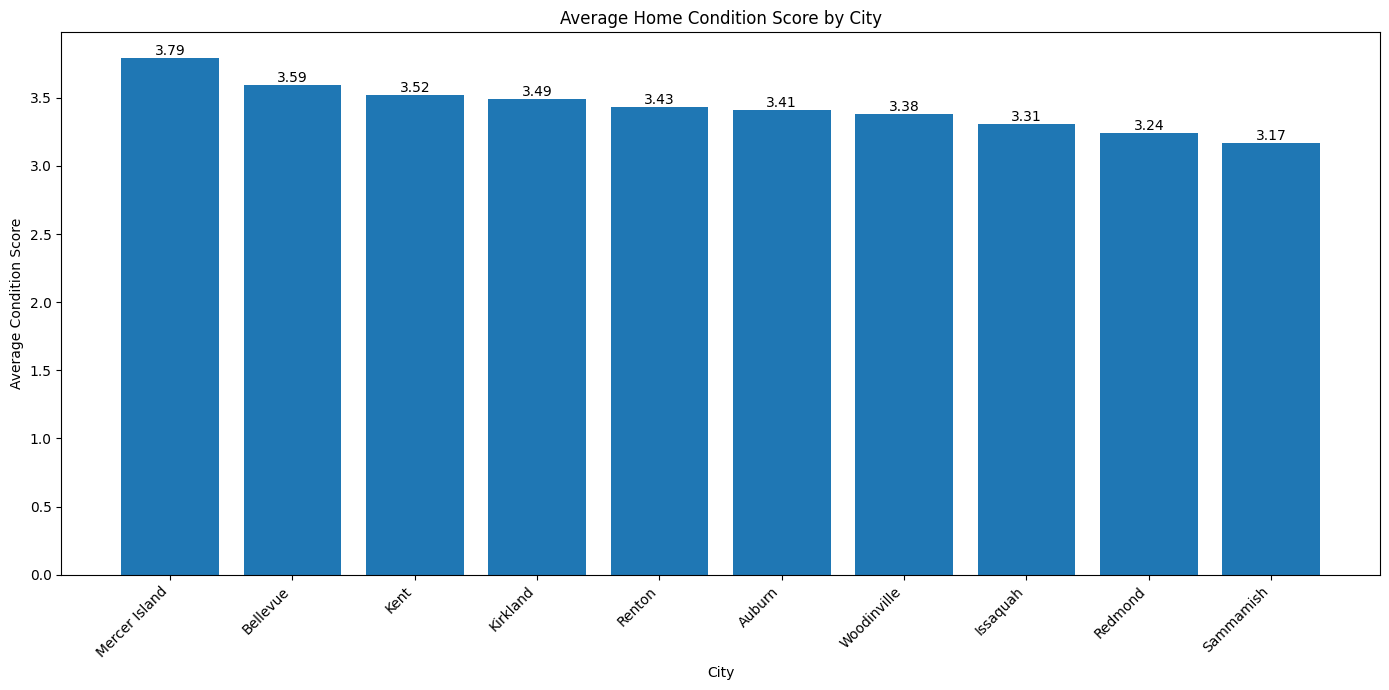

In [ ]:
# prompt: bar chart of seattle, bellevue, redmond, kirkland, sammamish, issaquah, renton, mercer island, kent, woodinville by average home condition score

import matplotlib.pyplot as plt

# Assuming 'housing_data' DataFrame is already loaded and processed

# Specify the cities of interest
cities_of_interest = ['Bellevue', 'Redmond', 'Kirkland', 'Sammamish', 'Issaquah', 'Renton', 'Mercer Island', 'Kent', 'Woodinville', 'Auburn']

# Filter the data for the specified cities
filtered_data = housing_data[housing_data['city'].isin(cities_of_interest)]

# Calculate the average home condition score for each city
city_avg_condition = filtered_data.groupby('city')['condition'].mean().sort_values(ascending=False)


# Create the bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(city_avg_condition.index, city_avg_condition.values)
plt.title('Average Home Condition Score by City')
plt.xlabel('City')
plt.ylabel('Average Condition Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the average condition score as labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

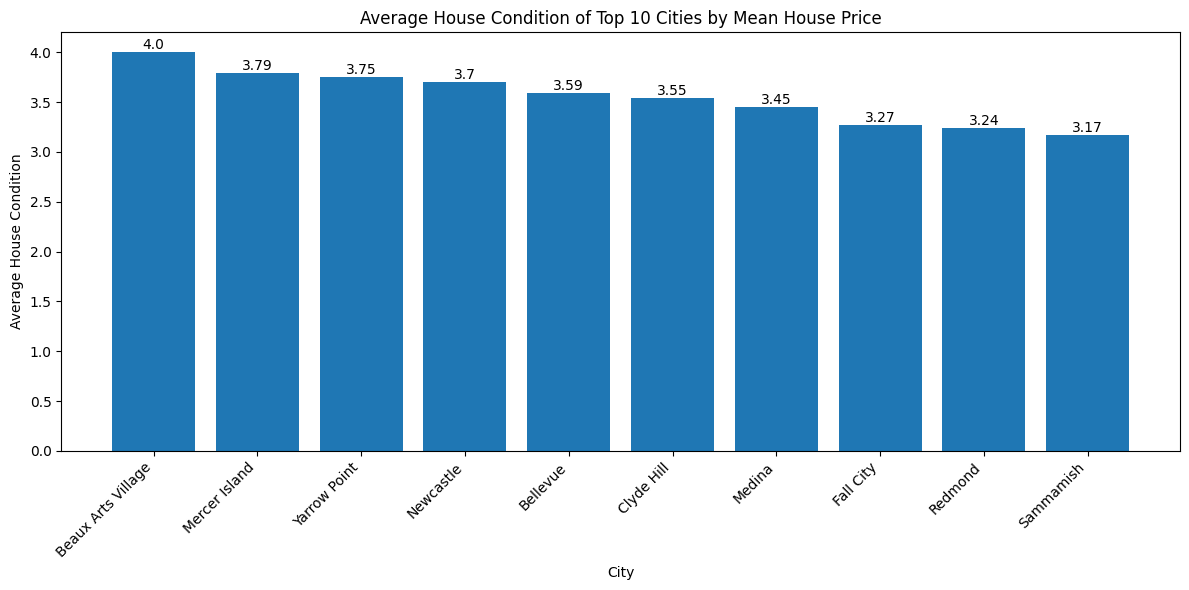

In [ ]:
# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the mean house price for each city
mean_house_price_by_city = housing_data.groupby('city')['price'].mean()

# Sort cities by mean house price in descending order and get the top 10
top_10_cities = mean_house_price_by_city.sort_values(ascending=False).head(10)

# Merge with original dataframe to get the condition
top_10_with_condition = housing_data[housing_data['city'].isin(top_10_cities.index)].groupby('city')['condition'].mean().sort_values(ascending=False)


# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_with_condition.index, top_10_with_condition.values)
plt.title('Average House Condition of Top 10 Cities by Mean House Price')
plt.xlabel('City')
plt.ylabel('Average House Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add average house condition labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

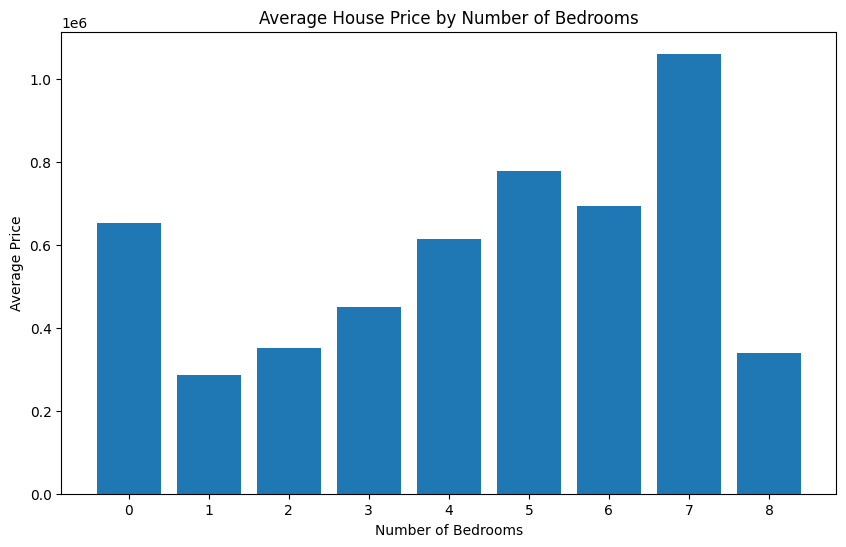

In [ ]:

# Assuming 'housing_data' DataFrame is already loaded and processed

# Group data by the number of bedrooms and calculate the average price
bedroom_avg_price = housing_data.groupby('bedrooms')['price'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bedroom_avg_price.index, bedroom_avg_price.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average House Price by Number of Bedrooms')
plt.xticks(bedroom_avg_price.index)  # Ensure all bedroom counts are shown on the x-axis
plt.show()

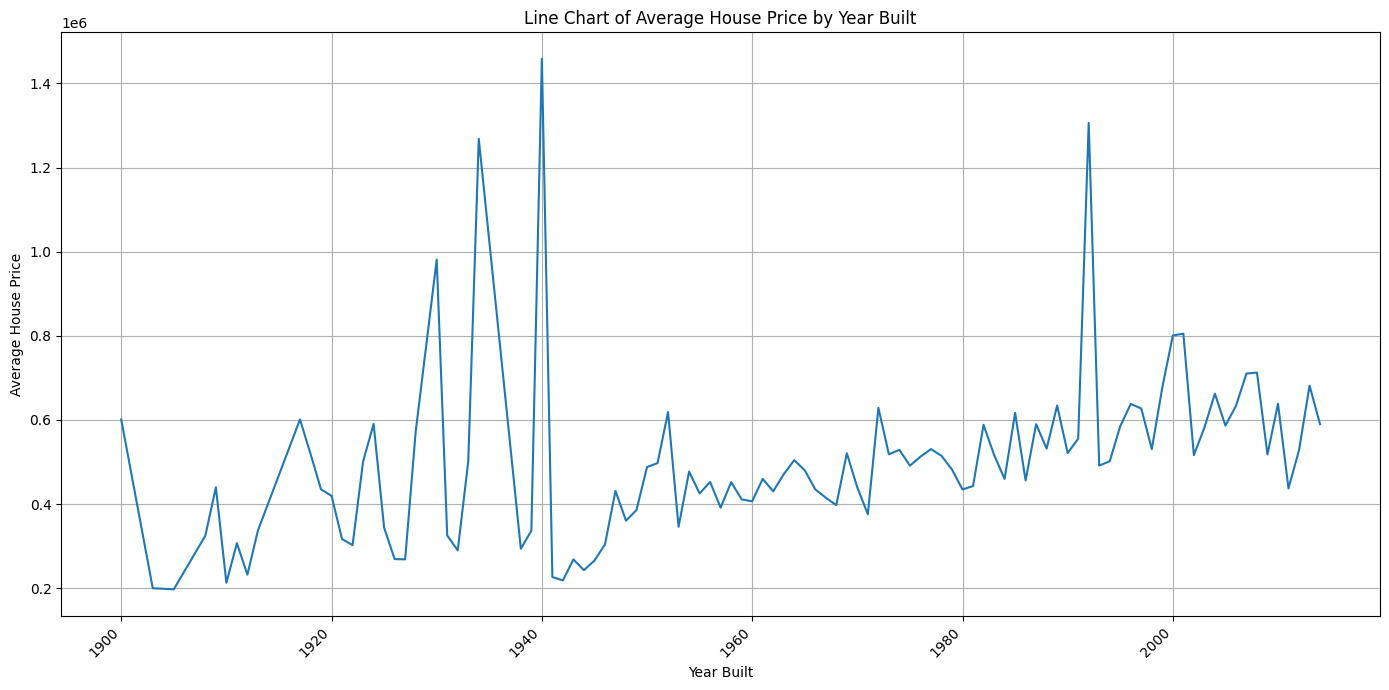

In [ ]:


# Assuming 'housing_data' DataFrame is already loaded and processed

# Group data by 'yr_built' and calculate the average price
average_price_by_year = housing_data.groupby('yr_built')['price'].mean()

# Create the line chart
plt.figure(figsize=(14, 7))
plt.plot(average_price_by_year.index, average_price_by_year.values)
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.title('Line Chart of Average House Price by Year Built')
plt.grid(True)  # Add a grid for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

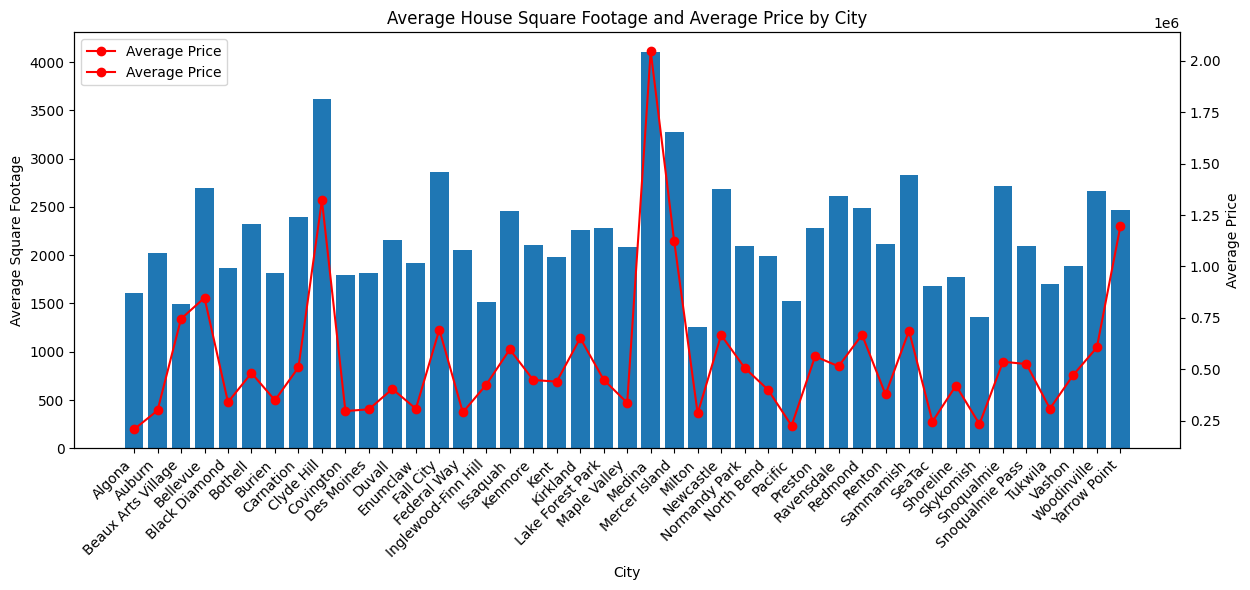

In [ ]:

# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the average sqft_living for each city
avg_sqft_by_city = housing_data.groupby('city')['sqft_living'].mean()

# Merge with the average price data
city_data = pd.DataFrame({'avg_price': mean_house_price_by_city, 'avg_sqft': avg_sqft_by_city})

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_data.index, city_data['avg_sqft'], label='Average Sqft')
plt.xlabel('City')
plt.ylabel('Average Square Footage')
plt.title('Average House Square Footage and Average Price by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create a second y-axis for average price
ax2 = plt.gca().twinx()
ax2.plot(city_data.index, city_data['avg_price'], color='red', marker='o', label='Average Price')
ax2.set_ylabel('Average Price')


# Add a legend
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')


plt.show()

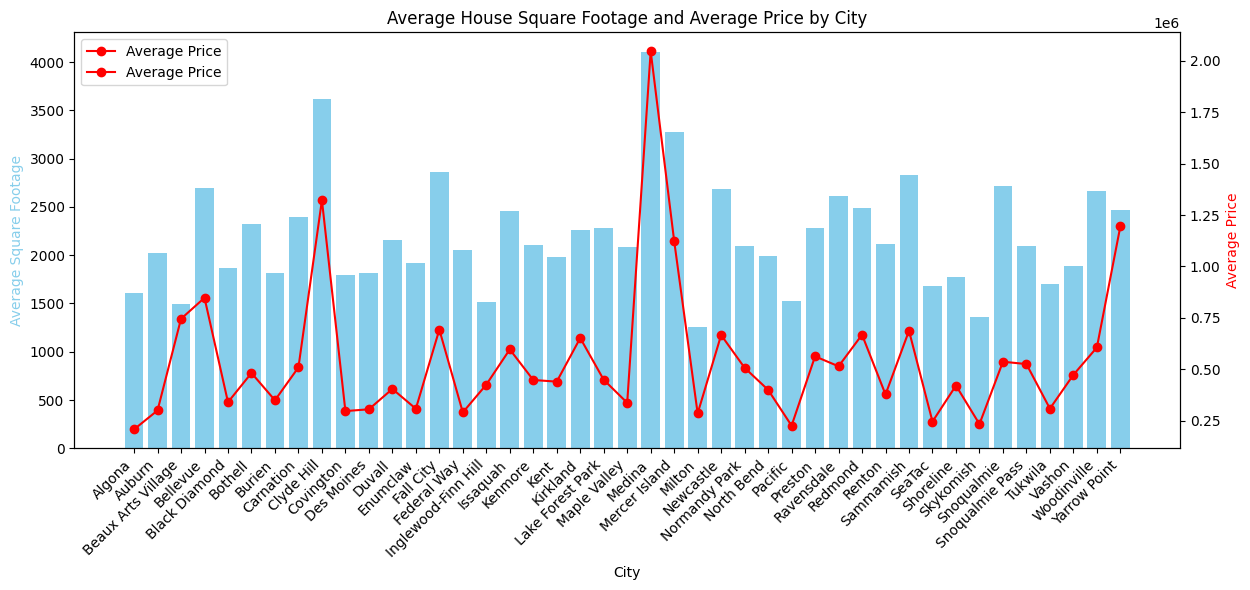

In [ ]:

# Assuming 'housing_data' DataFrame and 'mean_house_price_by_city' are already calculated

# Calculate the average sqft_living for each city
avg_sqft_by_city = housing_data.groupby('city')['sqft_living'].mean()

# Merge with the average price data
city_data = pd.DataFrame({'avg_price': mean_house_price_by_city, 'avg_sqft': avg_sqft_by_city})

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_data.index, city_data['avg_sqft'], label='Average Sqft', color='skyblue') # Added color for better visual distinction
plt.xlabel('City')
plt.ylabel('Average Square Footage', color='skyblue') # Color-coded y-axis labels
plt.title('Average House Square Footage and Average Price by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create a second y-axis for average price
ax2 = plt.gca().twinx()
ax2.plot(city_data.index, city_data['avg_price'], color='red', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='red') # Color-coded y-axis labels


# Add a legend with better placement
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left') # More explicit legend location

plt.show()

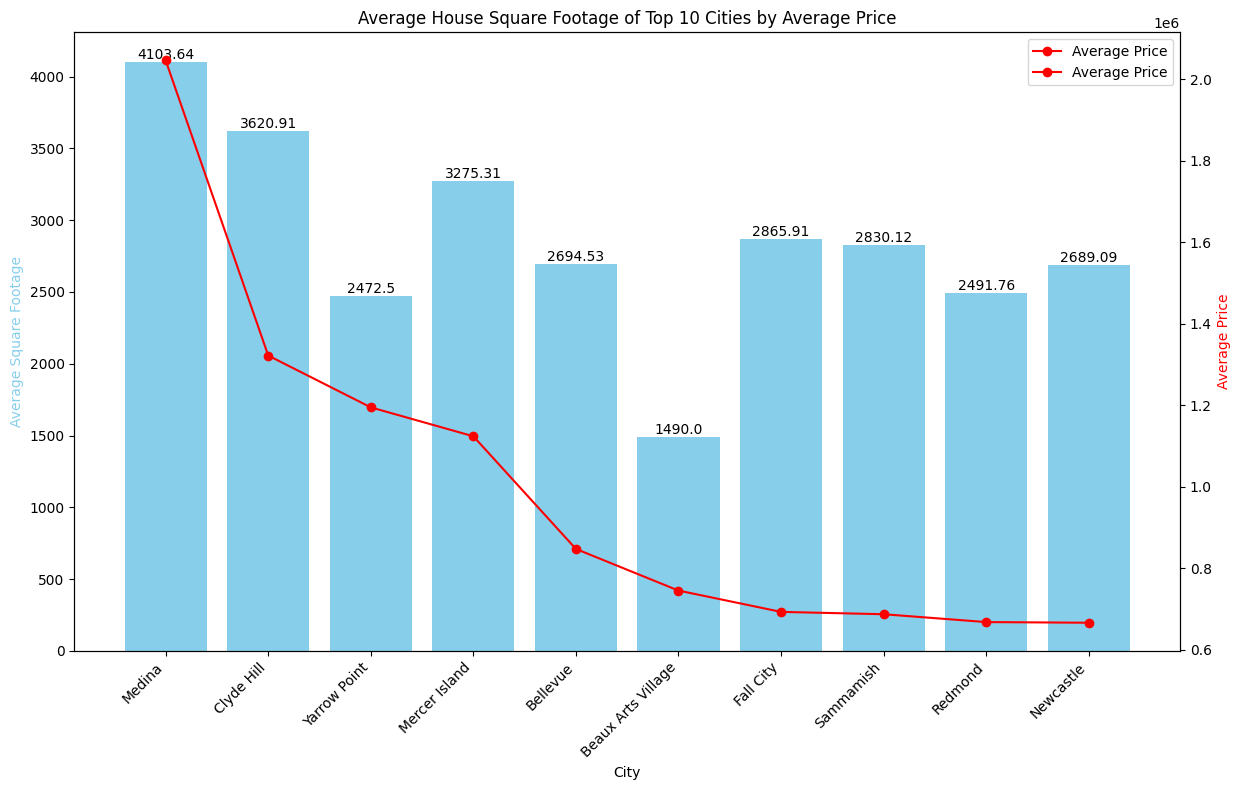

In [ ]:

# Assuming 'housing_data' DataFrame and 'mean_house_price_by_city' are already calculated

# Calculate the average sqft_living for each city
avg_sqft_by_city = housing_data.groupby('city')['sqft_living'].mean()

# Merge with the average price data
city_data = pd.DataFrame({'avg_price': mean_house_price_by_city, 'avg_sqft': avg_sqft_by_city})

# Sort cities by average price in descending order and get the top 10
top_10_cities = city_data.sort_values('avg_price', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_cities.index, top_10_cities['avg_sqft'], label='Average Sqft', color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Square Footage', color='skyblue')
plt.title('Average House Square Footage of Top 10 Cities by Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add average sqft labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Create a second y-axis for average price
ax2 = plt.gca().twinx()
ax2.plot(top_10_cities.index, top_10_cities['avg_price'], color='red', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='red')

# Add a legend
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

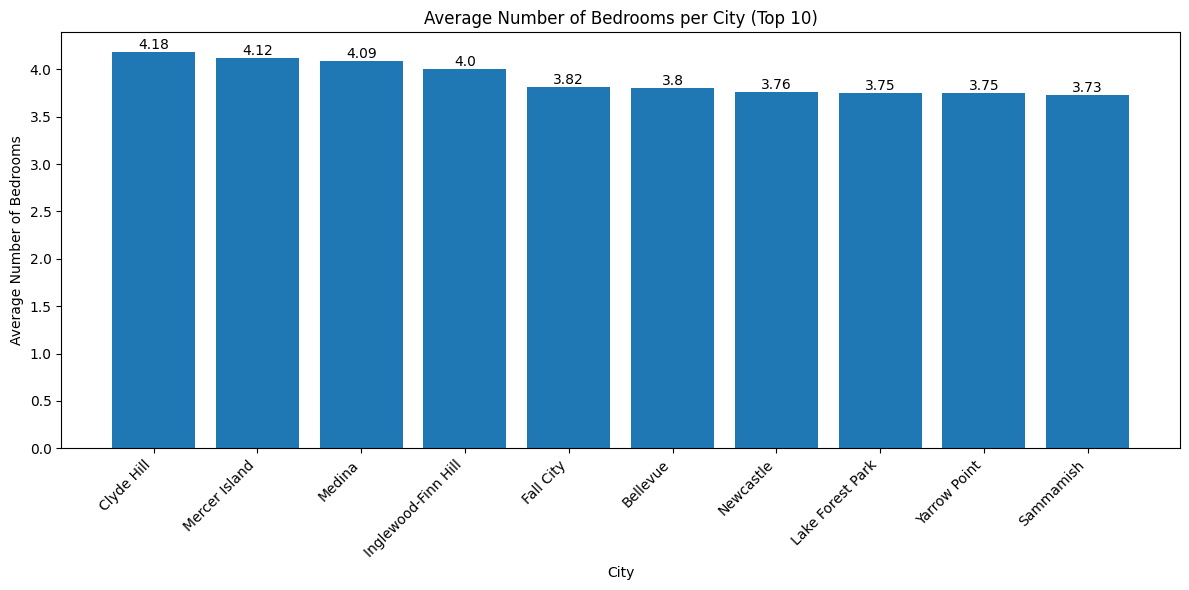

In [ ]:

# Assuming 'housing_data' DataFrame is already loaded and processed

# Calculate the average number of bedrooms for each city
avg_bedrooms_by_city = housing_data.groupby('city')['bedrooms'].mean()

# Sort cities by average number of bedrooms in descending order and get the top 10
top_cities_bedrooms = avg_bedrooms_by_city.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_cities_bedrooms.index, top_cities_bedrooms.values)
plt.title('Average Number of Bedrooms per City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Number of Bedrooms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the average number of bedrooms as labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
# drop columns - street, view, waterfront, statezip, city, sqft_above, sqft_basement, yr_built, yr_renovated and country
housing_data = housing_data.drop(['street', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'statezip', 'city', 'country'], axis=1)

In [ ]:
# One-Hot Encode the 'city' column
housing_data = pd.get_dummies(housing_data, columns=['city'], drop_first=True)

In [ ]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,313000,3,1,1340,7912,1,3
2,342000,3,2,1930,11947,1,4
3,420000,3,2,2000,8030,1,4
4,550000,4,2,1940,10500,1,4
6,335000,2,2,1350,2560,1,3


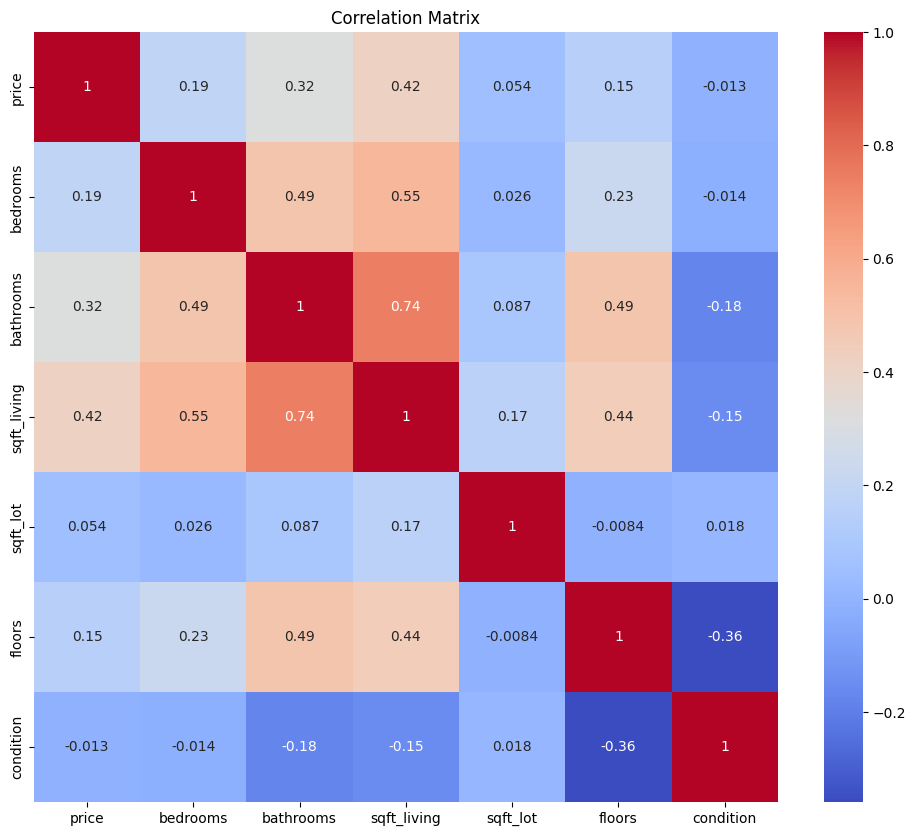

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Define the features (independent variables) and the target variable
features = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'floors', 'condition']
X = housing_data[features]
y = housing_data['price']  # Target variable: house price

In [ ]:
# Splitting the data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #

In [ ]:
# Training the MOdel
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.4848169890935421
Mean Squared Error: 54358300414.1594


In [ ]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

       Feature   Coefficient
0     bedrooms -61248.303271
1    bathrooms  46123.413943
2     sqft_lot     -0.420829
3  sqft_living    288.836334
4       floors -70350.496621
5    condition  49565.915952


In [ ]:
# Add a constant to the features for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the statistical summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     80.29
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           8.44e-92
Time:                        17:49:07   Log-Likelihood:                -35662.
No. Observations:                2421   AIC:                         7.134e+04
Df Residuals:                    2414   BIC:                         7.138e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.745e+04   1.01e+05     -0.469      

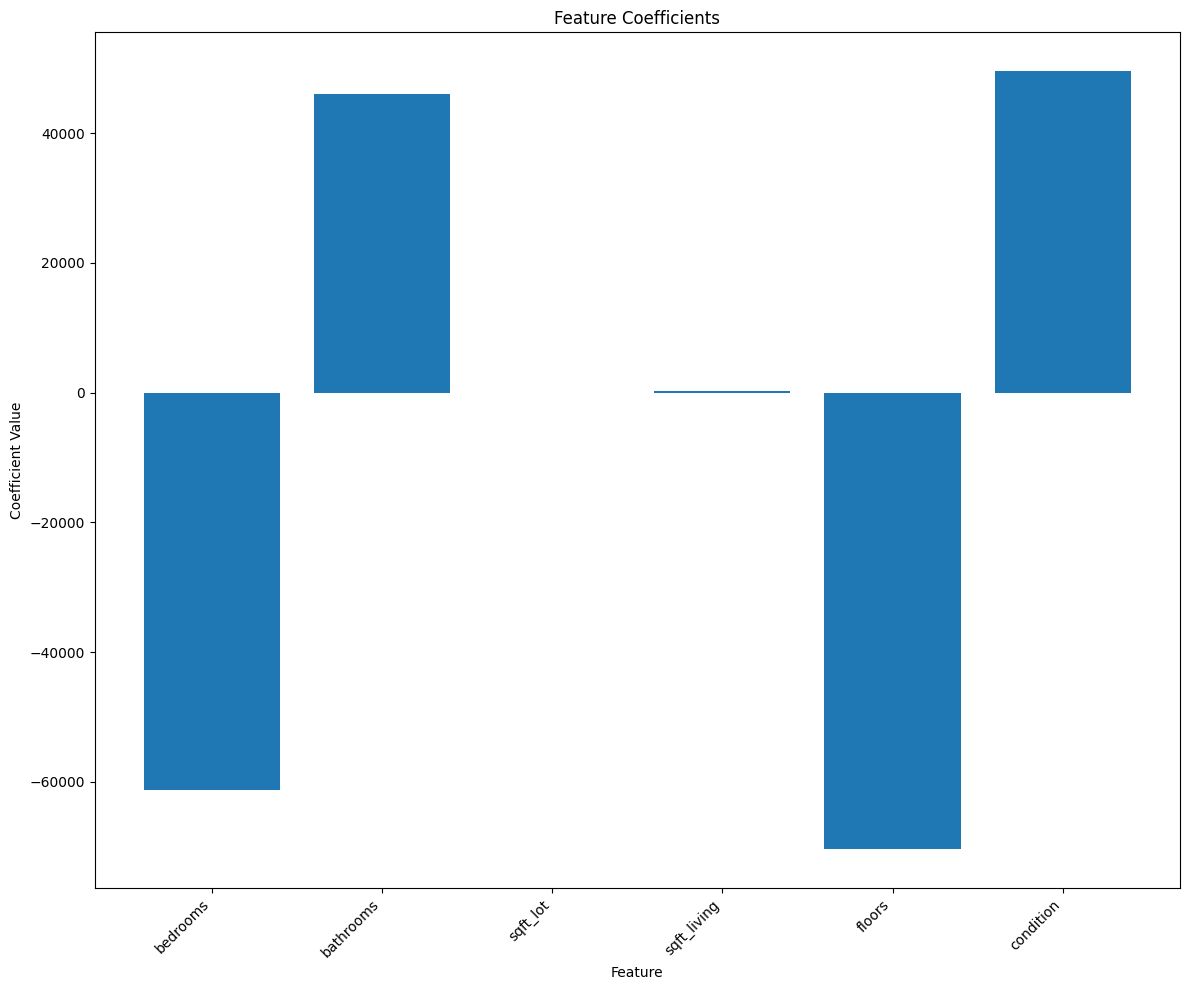

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'coefficients' DataFrame is already created as in the previous code

plt.figure(figsize=(12, 10))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

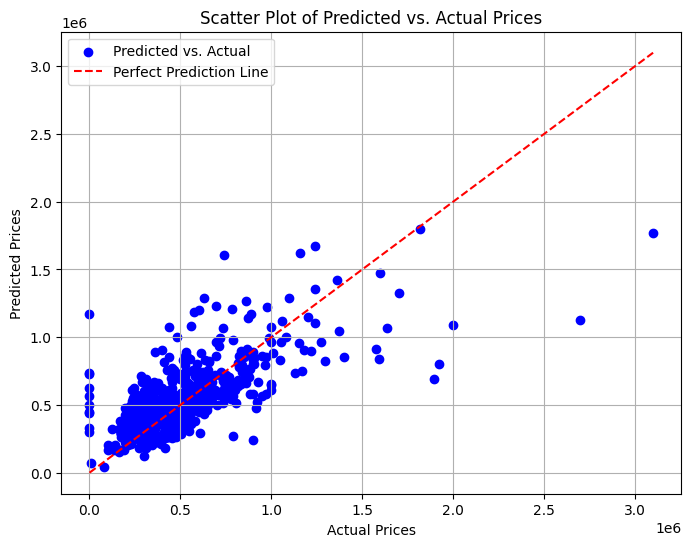

In [ ]:
# prompt: Scatter Plot of Predicted vs. Actual Prices use different colors for each one

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your model's predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')  # Use blue for predictions vs actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')  # Add perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of Predicted vs. Actual Prices')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()